Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set up

## Import các thư viện cần thiết

In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd
import cv2

## Kết nối với google drive

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Di chuyển đến thư mục chứa google colab

In [5]:
folder_path = '/content/drive/MyDrive/Colab'
%cd "{folder_path}"

/content/drive/MyDrive/Colab


## Upload file

In [6]:
# from google.colab import files
# uploaded = files.upload()

## List các file trong thư mục

In [7]:
import os

files = os.listdir(folder_path)
for file_name in files:
    print(file_name)

ML-cơ bản.ipynb
dự đoán giá nhà.ipynb
findal-project-data(UET).ipynb
Python-private-HIT.ipynb
deeplearning_khanhAI.ipynb
hotel-reviews.ipynb
python-N2-pandas.ipynb
pandas.ipynb
finalHomework.ipynb


# Numpy

In [8]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)


In [9]:
# hàm ban đầu
def find_max_down_fall(prices):
  #1
  min_right_to_left = [0 for i in range((len(prices)))] # khởi tạo 1 list toàn số 0 với kích thước bằng với mảng prices
  #2
  min_so_far = float('inf') # gán một giá trị lớn vô cùng cho min_so_far
  #3
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  # for i in min_right_to_left :
  #   print(min_right_to_left[i] , end = " ")
  res = 0
  #4
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [10]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

823 ms ± 88.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
# hàm sau khi được viết lại bằng numpy
import numpy as np

def find_max_down_fall_np(prices_np):
    #1
    min_right_to_left = np.zeros_like(prices)
    #2
    min_so_far = np.Infinity
    #3
    min_right_to_left = np.minimum.accumulate(prices_np[::-1])[::-1]
    res = 0
    buys = np.array(prices_np)
    worst_sells = np.minimum.accumulate(min_right_to_left)
    down_falls = (buys - worst_sells) / buys
    res =  np.max(down_falls)
    return res
  # end your code

In [12]:
# for i in prices :
#   print(i , end = " ")
print(prices[0])
print(type(prices))

657369
<class 'list'>


In [13]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array(prices)
# end your code
%timeit find_max_down_fall_np(prices_np)

252 ms ± 4.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
print(prices_np[0])
print(type(prices_np))

657369
<class 'numpy.ndarray'>


In [15]:
# so sánh kết quả // em thử với mảng prices tầm 100 giá trị thì đúng còn tầm 1tr thì sai
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)


True

# Pandas + Matplotlib

## Gọi file csv

In [16]:
df_matches = pd.read_csv("/content/drive/MyDrive/data/matches_world_cup_2022_catar.csv")
df_events = (df_matches[['events_list']])

## Hiển thị 5 dòng đầu của dataframe

In [17]:
import ast

data_list = ast.literal_eval(df_events.iloc[0][0])

for i in range(1,64):
  data_list += ast.literal_eval(df_events.iloc[i][0])


In [18]:

df_events_new = pd.DataFrame(data_list)
df_events = df_events_new

In [19]:
df_matches.head(5)

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


In [20]:
df_events

,event_team,event_time,event_type,action_player_1,action_player_2,event_result,event_player
0,home,23',Penalty,Lionel Messi,Penalty,NaN,NaN
1,home,36',Goal,Ángel Di María,Alexis Mac Allister,NaN,NaN
2,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé,NaN,NaN
3,away,41',Substitution,Marcus Thuram,Olivier Giroud,NaN,NaN
4,home,52',Yellow card,Enzo Fernández,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1038,home,72',Substitution,Mohammed Muntari,Almoez Ali,NaN,NaN
1039,away,77',Substitution,José Cifuentes,Enner Valencia,NaN,NaN
1040,home,78',Yellow card,Akram Afif,NaN,NaN,NaN
1041,away,90',Substitution,Kevin Rodríguez,Michael Estrada,NaN,NaN


## Hiển thị 5 dòng cuối của các dataframe

In [21]:
df_matches.tail(5)

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
59,60,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,...,0.04,657383,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number...","['Martínez', 'Messi', 'Gómez', 'Paredes', 'De ...","['22', '10', '17', '5', '7', '11', '3', '19', ...","['Al-Shehri', 'Al-Dawsari', 'Kanno', 'Al-Faraj...","['11', '10', '23', '7', '9', '8', '13', '5', '..."
60,61,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,...,0.40,361145,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '...","['Pulisic', 'Sargent', 'Weah', 'Musah', 'Adams...","['10', '24', '21', '6', '4', '8', '5', '13', '...","['James', 'Bale', 'Williams', 'Wilson', 'Ampad...","['20', '11', '3', '8', '15', '10', '14', '4', ..."
61,62,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,...,0.71,457977,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player_number'...","['Dia', 'Sarr', 'Gueye', 'Diatta', 'Mendy', 'K...","['9', '18', '5', '15', '6', '8', '22', '4', '3...","['Bergwijn', 'Janssen', 'Gakpo', 'Blind', 'De ...","['7', '18', '8', '17', '21', '11', '22', '5', ..."
62,63,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,...,0.06,498752,Khalifa International Stadium,"[{'event_team': 'away', 'event_time': "" 20' "",...","[{'player_name': ' Kane ', 'player_number': ' ...","[{'player_name': ' Taremi ', 'player_number': ...","['Kane', 'Sterling', 'Mount', 'Saka', 'Rice', ...","['9', '10', '19', '17', '4', '22', '3', '6', '...","['Taremi', 'Hajsafi', 'Karimi', 'Nourollahi', ...","['9', '3', '18', '21', '7', '5', '19', '15', '..."
63,64,Group stage: Matchday 1,20/11/2022,False,False,False,Qatar,Ecuador,0,2,...,0.66,528736,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'player_name': ' Afif ', 'player_number': ' ...","[{'player_name': ' Estrada ', 'player_number':...","['Afif', 'Almoez', 'Abdulaziz', 'Boudiaf', 'Al...","['11', '19', '6', '12', '10', '14', '3', '16',...","['Estrada', 'Valencia', 'Ibarra', 'Caicedo', '...","['11', '13', '10', '23', '20', '19', '7', '3',..."


## In ra thông tin của từng dataframe

In [22]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [23]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_team       1043 non-null   object
 1   event_time       1043 non-null   object
 2   event_type       1043 non-null   object
 3   action_player_1  1002 non-null   object
 4   action_player_2  730 non-null    object
 5   event_result     41 non-null     object
 6   event_player     41 non-null     object
dtypes: object(7)
memory usage: 57.2+ KB


- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây:
- em thấy trong df_matches không có có trị null .
- còn trong df_events thì bị miss dũ liệu khá nhiều .

In [24]:
# lấy ra danh sáhc các dữ liệu trong action_player_1
list_values = df_matches['team_name_home'].unique()
list_values.shape

(32,)

## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [25]:
result_matches_3 = df_matches[df_matches['team_home_score'] +  df_matches['team_away_score'] >= 3]
result_matches_3[['team_name_home','team_name_away']]


,team_name_home,team_name_away
0,Argentina,France
1,Croatia,Morocco
3,Argentina,Croatia
4,England,France
6,Netherlands,Argentina
8,Portugal,Switzerland
10,Brazil,South Korea
12,England,Senegal
13,France,Poland
14,Argentina,Australia


## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

In [26]:
location_matches = df_matches['location'].unique
location_matches


<bound method Series.unique of 0             Lusail Iconic Stadium
1     Khalifa International Stadium
2                   Al Bayt Stadium
3             Lusail Iconic Stadium
4                   Al Bayt Stadium
                  ...              
59            Lusail Iconic Stadium
60            Ahmad bin Ali Stadium
61               Al Thumama Stadium
62    Khalifa International Stadium
63                  Al Bayt Stadium
Name: location, Length: 64, dtype: object>

<Axes: ylabel='location'>

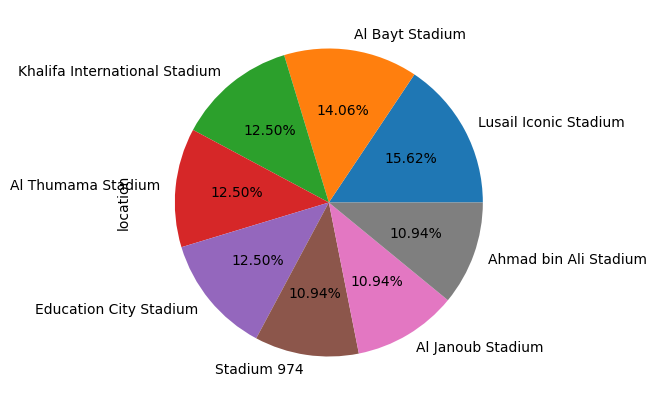

In [27]:
df_matches['location'].value_counts().plot(kind='pie', autopct='%0.2f%%', figsize=(10, 5))


## Lấy ra tên của các đội tham dự giải đấu

In [28]:
joined_team = pd.concat([df_matches['team_name_away'], df_matches['team_name_home']]).unique()
joined_team.sort()
joined_team

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'USA', 'Uruguay', 'Wales'], dtype=object)

## Lấy ra số bàn thắng được ghi bởi các đội

In [29]:
goals_by_team = pd.DataFrame({
    'Team': pd.concat([df_matches['team_name_away'], df_matches['team_name_home']]),
    'Goals': pd.concat([df_matches['team_home_score'], df_matches['team_away_score']])
})
total_goals_by_team = goals_by_team.groupby('Team')['Goals'].sum().reset_index()
total_goals_by_team

,Team,Goals
0,Argentina,8
1,Australia,6
2,Belgium,2
3,Brazil,3
4,Cameroon,4
5,Canada,7
6,Costa Rica,11
7,Croatia,7
8,Denmark,3
9,Ecuador,3


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

<Axes: xlabel='Team'>

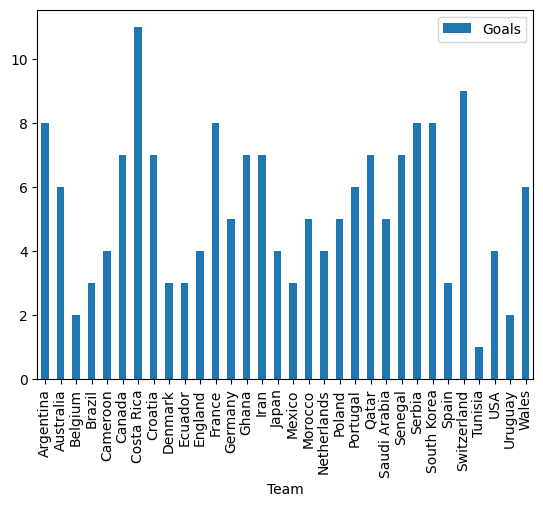

In [30]:
total_goals_by_team.set_index('Team', inplace=True)
total_goals_by_team.plot.bar()


##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [31]:
df_matches.head(2)

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."


In [32]:
df_events.head(10)

,event_team,event_time,event_type,action_player_1,action_player_2,event_result,event_player
0,home,23',Penalty,Lionel Messi,Penalty,NaN,NaN
1,home,36',Goal,Ángel Di María,Alexis Mac Allister,NaN,NaN
2,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé,NaN,NaN
3,away,41',Substitution,Marcus Thuram,Olivier Giroud,NaN,NaN
4,home,52',Yellow card,Enzo Fernández,NaN,NaN,NaN
5,away,55',Yellow card,Adrien Rabiot,NaN,NaN,NaN
6,home,64',Substitution,Marcos Acuña,Ángel Di María,NaN,NaN
7,away,71',Substitution,Eduardo Camavinga,Theo Hernandez,NaN,NaN
8,away,71',Substitution,Kingsley Coman,Antoine Griezmann,NaN,NaN
9,away,80',Penalty,Kylian Mbappé,Penalty,NaN,NaN


In [33]:
# goals_by_Argentina = pd.DataFrame({
#     'players': pd.concat([df_events['action_player_1'], df_events['action_player_2']]),
#     'Goals': pd.concat([df_matches['team_home_score'], df_matches['team_away_score']])
# })

<ipython-input-33-23fced6d2a58>:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  goals_by_Argentina = pd.DataFrame({


ValueError: cannot reindex on an axis with duplicate labels

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

In [ ]:
...

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
...

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

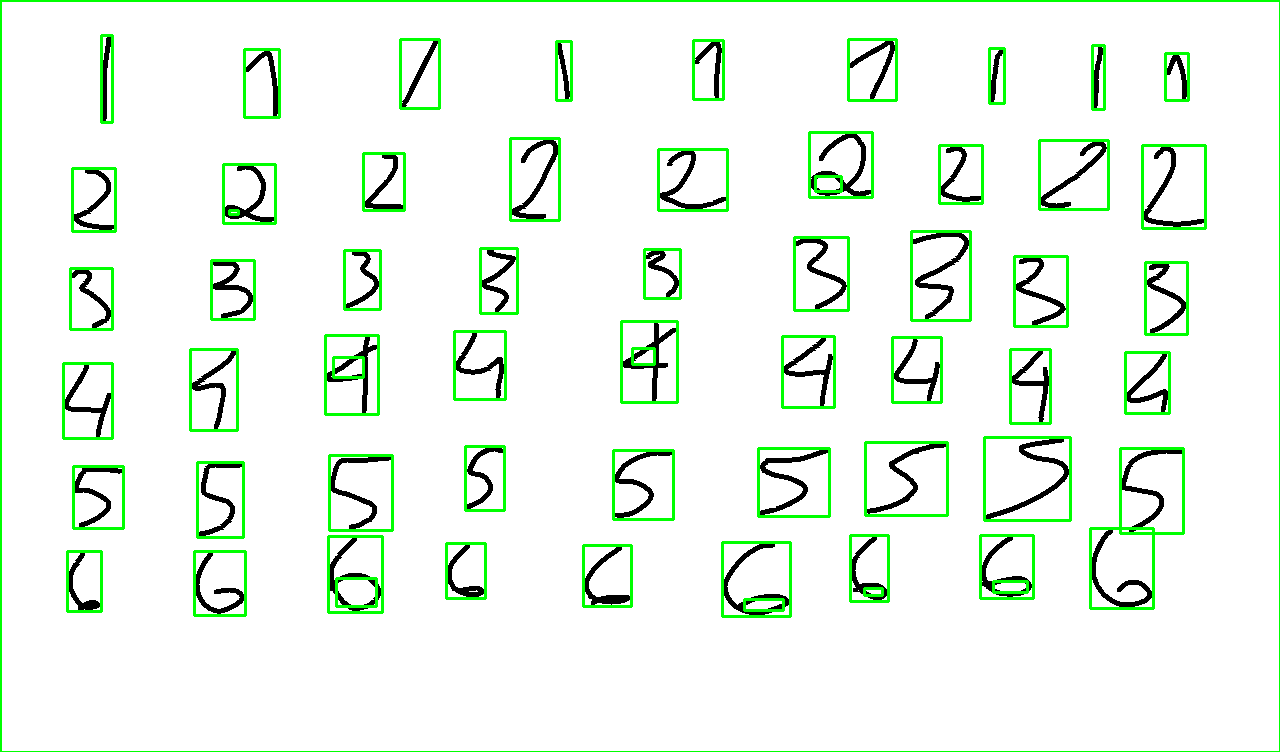

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Đọc hình ảnh từ file
image = cv2.imread(r"/content/drive/MyDrive/data/freeDrawExport_012314055352.png")

# Chuyển đổi hình ảnh sang ảnh grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Phân ngưỡng để tạo ảnh nhị phân
_, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

# Tìm contours trong ảnh nhị phân
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ bounding box cho mỗi contour
for contour in contours:
    # Lấy bounding box
    x, y, w, h = cv2.boundingRect(contour)

    # Vẽ bounding box lên hình ảnh gốc
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Hiển thị hình ảnh có bounding box
if image is None:
    print("Không thể đọc ảnh. Hãy chắc chắn rằng đường dẫn đến ảnh là đúng.")
else:
    # Hiển thị ảnh
    cv2_imshow(image)
    # Đợi bất kỳ phím nào được nhấn và sau đó đóng cửa sổ
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

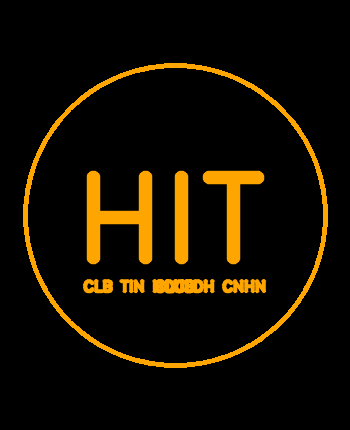

In [36]:
# Tạo một hình ảnh đen (một bảng vẽ đen) kích thước 430x350 pixel
image_height, image_width = 430, 350
black_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Tọa độ và bán kính của đường tròn
center_coordinates = (image_width // 2, image_height // 2)
radius = 150

# Màu cam trong định dạng BGR
orange_color = (0, 165, 255)

# Vẽ đường tròn lên hình ảnh
cv2.circle(black_image, center_coordinates, radius, orange_color, thickness=4)

# Thêm chữ "HIT"
text = "HIT"
font =  cv2.FONT_HERSHEY_DUPLEX
font_scale = 4
font_thickness = 7
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_position = ((image_width - text_size[0]) // 2, (image_height + text_size[1]) // 2)

text_2 = "CLB TIN HOC DH CNHN"
text_size_2 = cv2.getTextSize(text_2, font, 0.5, 2)[0]
text_2_position = ((image_width - text_size_2[0]) // 2 , (image_height + text_size_2[1]) // 2 + 70)

cv2.putText(black_image, text, text_position, font, font_scale, orange_color, font_thickness, cv2.LINE_AA)
cv2.putText(black_image, text_2, text_2_position, font, 0.5 , orange_color, 2, cv2.LINE_AA)

text_3 = "CLUB"
rotation_angle = 90
text_size_3 = cv2.getTextSize(text_3, font, 0.5, 2)[0]
text_3_position = ((image_width - text_size_3[0]) // 2 , (image_height + text_size_3[1]) // 2 + 70)
cv2.putText(black_image,text_3,text_3_position,font,0.5,orange_color,2,cv2.LINE_AA)


rotation_angle = 90

cv2.putText(black_image, text_3, text_3_position, font, 0.5 , orange_color, 2, cv2.LINE_AA)
cv2_imshow(black_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [ ]:
...